<a href="https://colab.research.google.com/github/Deeptansh14/beta-analysis-using-regression/blob/main/combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats


In [ ]:
#Download stock prices for the security monthly data last 5 years
bajajauto_df = yf.download('BAJAJ-AUTO.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
bajajauto_df.head()

#Download stock prices for the security monthly data last 5 years
eichermot_df = yf.download('EICHERMOT.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
eichermot_df.head()

#Download stock prices for the security monthly data last 5 years
tvsmotor_df = yf.download('TVSMOTOR.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
tvsmotor_df.head()

#Download stock prices for the security monthly data last 5 years
atulauto_df = yf.download('ATULAUTO.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
atulauto_df.head()

#Download stock prices for the security monthly data last 5 years
mahindra_df = yf.download('M&M.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
mahindra_df.head()

#Download stock prices for the security monthly data last 5 years
heromotoco_df = yf.download('HEROMOTOCO.NS',
                      start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
heromotoco_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,1590.099976,2198.100098,1543.150024,2166.699951,1978.743408,31556392
2020-05-01,2166.699951,2391.899902,1933.250000,2360.850098,2156.051270,42918890
2020-06-01,2360.750000,2590.649902,2230.699951,2546.949951,2326.007568,46048933
2020-07-01,2556.000000,2885.699951,2530.000000,2676.500000,2444.319336,31714342
2020-08-01,2700.000000,3181.350098,2620.750000,3006.050049,2770.193848,36813299


In [ ]:
#Download Market index closing prices
nifty_df = yf.download('^NSEI',start='2020-03-31',
                      end='2023-03-31',
                      progress=False,interval ='1mo'
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,8584.099609,9889.049805,8055.799805,9859.900391,9859.900391,12736300
2020-05-01,9533.500000,9598.849609,8806.750000,9580.299805,9580.299805,13675900
2020-06-01,9726.849609,10553.150391,9544.349609,10302.099609,10302.099609,16778800
2020-07-01,10323.799805,11341.400391,10299.599609,11073.450195,11073.450195,14640200
2020-08-01,11057.549805,11794.250000,10882.250000,11387.500000,11387.500000,14035500


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2020-04-01         NaN
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-12-01   -0.035434
2023-01-01   -0.024781
2023-02-01   -0.020489
2023-03-01    0.003220
Name: Return_NIFTY, dtype: float64


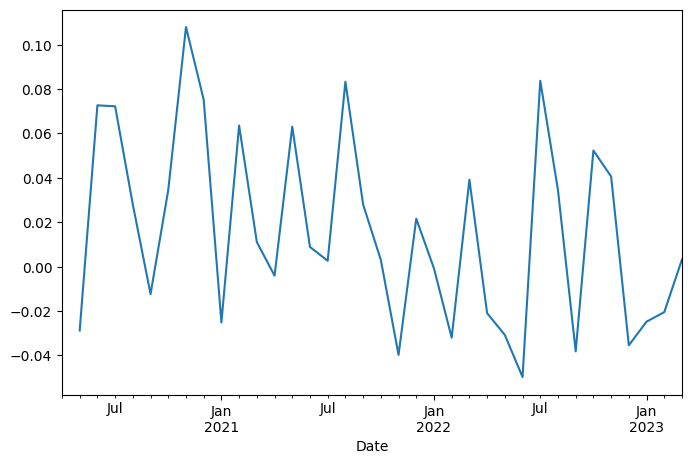

In [ ]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

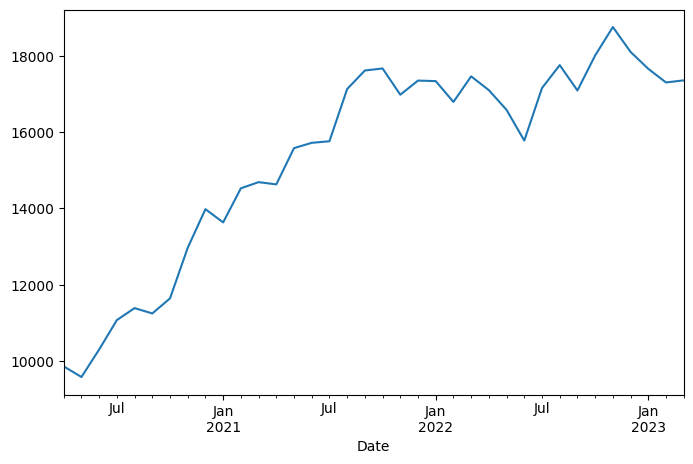

In [ ]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2020-05-01,9533.500000,9598.849609,8806.750000,9580.299805,9580.299805,13675900,-0.028767
2020-06-01,9726.849609,10553.150391,9544.349609,10302.099609,10302.099609,16778800,0.072639
2020-07-01,10323.799805,11341.400391,10299.599609,11073.450195,11073.450195,14640200,0.072203
2020-08-01,11057.549805,11794.250000,10882.250000,11387.500000,11387.500000,14035500,0.027966
2020-09-01,11464.299805,11618.099609,10790.200195,11247.549805,11247.549805,12928400,-0.012366


In [ ]:
#Caclulate log returns
bajajauto_df['Return_BAJAJ-AUTO'] = np.log(bajajauto_df['Adj Close']/bajajauto_df['Adj Close'].shift(1))
print(bajajauto_df['Return_BAJAJ-AUTO'])

Date
2020-04-01         NaN
2020-05-01    0.032700
2020-06-01    0.041747
2020-07-01    0.061381
2020-08-01   -0.012710
2020-09-01   -0.029379
2020-10-01    0.002011
2020-11-01    0.094668
2020-12-01    0.081797
2021-01-01    0.151095
2021-02-01   -0.053084
2021-03-01   -0.034304
2021-04-01    0.043488
2021-05-01    0.089525
2021-06-01   -0.014159
2021-07-01   -0.076449
2021-08-01    0.007070
2021-09-01    0.027725
2021-10-01   -0.033266
2021-11-01   -0.134624
2021-12-01    0.002758
2022-01-01    0.092642
2022-02-01   -0.009669
2022-03-01    0.034152
2022-04-01    0.020739
2022-05-01    0.035441
2022-06-01   -0.041614
2022-07-01    0.091430
2022-08-01    0.042610
2022-09-01   -0.146625
2022-10-01    0.040035
2022-11-01    0.021247
2022-12-01   -0.036560
2023-01-01    0.054410
2023-02-01   -0.042001
2023-03-01    0.059268
Name: Return_BAJAJ-AUTO, dtype: float64


In [ ]:
#Caclulate log returns
eichermot_df['Return_EICHERMOT'] = np.log(eichermot_df['Adj Close']/eichermot_df['Adj Close'].shift(1))
print(eichermot_df['Return_EICHERMOT'])


Date
2020-04-01         NaN
2020-05-01    0.117904
2020-06-01    0.102481
2020-07-01    0.118394
2020-08-01    0.013538
2020-09-01    0.051609
2020-10-01   -0.054673
2020-11-01    0.194999
2020-12-01   -0.001481
2021-01-01    0.080951
2021-02-01   -0.093795
2021-03-01    0.041299
2021-04-01   -0.072580
2021-05-01    0.099930
2021-06-01   -0.001870
2021-07-01   -0.054191
2021-08-01    0.057219
2021-09-01    0.046783
2021-10-01   -0.115921
2021-11-01   -0.047112
2021-12-01    0.089311
2022-01-01    0.020469
2022-02-01   -0.021279
2022-03-01   -0.052579
2022-04-01    0.068115
2022-05-01    0.055604
2022-06-01    0.004879
2022-07-01    0.101687
2022-08-01    0.082282
2022-09-01    0.095692
2022-10-01    0.047562
2022-11-01   -0.099865
2022-12-01   -0.076539
2023-01-01    0.010969
2023-02-01   -0.049451
2023-03-01   -0.051888
Name: Return_EICHERMOT, dtype: float64


In [ ]:
#Caclulate log returns
tvsmotor_df['Return_TVSMOTOR'] = np.log(tvsmotor_df['Adj Close']/tvsmotor_df['Adj Close'].shift(1))
print(tvsmotor_df['Return_TVSMOTOR'])

Date
2020-04-01         NaN
2020-05-01    0.022733
2020-06-01    0.119006
2020-07-01    0.023896
2020-08-01    0.110675
2020-09-01    0.078718
2020-10-01   -0.027713
2020-11-01    0.092512
2020-12-01   -0.029759
2021-01-01    0.145037
2021-02-01    0.058955
2021-03-01   -0.013182
2021-04-01    0.077907
2021-05-01   -0.025200
2021-06-01    0.008578
2021-07-01   -0.068705
2021-08-01   -0.098136
2021-09-01    0.045234
2021-10-01    0.187178
2021-11-01    0.035510
2021-12-01   -0.090660
2022-01-01   -0.033572
2022-02-01    0.018466
2022-03-01    0.012950
2022-04-01    0.051792
2022-05-01    0.117571
2022-06-01    0.133744
2022-07-01    0.075579
2022-08-01    0.081951
2022-09-01    0.046246
2022-10-01    0.104580
2022-11-01   -0.089295
2022-12-01    0.034922
2023-01-01   -0.045858
2023-02-01    0.041148
2023-03-01    0.002048
Name: Return_TVSMOTOR, dtype: float64


In [ ]:
#Caclulate log returns
atulauto_df['Return_ATULAUTO'] = np.log(atulauto_df['Adj Close']/atulauto_df['Adj Close'].shift(1))
print(atulauto_df['Return_ATULAUTO'])

Date
2020-04-01         NaN
2020-05-01   -0.008604
2020-06-01    0.008899
2020-07-01   -0.083099
2020-08-01    0.129552
2020-09-01   -0.044977
2020-10-01   -0.078815
2020-11-01    0.084402
2020-12-01    0.077558
2021-01-01   -0.037605
2021-02-01    0.071488
2021-03-01   -0.064189
2021-04-01    0.023498
2021-05-01    0.057341
2021-06-01   -0.032781
2021-07-01    0.144468
2021-08-01   -0.082449
2021-09-01    0.075271
2021-10-01    0.111177
2021-11-01   -0.138505
2021-12-01   -0.093306
2022-01-01    0.058803
2022-02-01   -0.129408
2022-03-01   -0.095901
2022-04-01    0.138859
2022-05-01   -0.070920
2022-06-01   -0.018987
2022-07-01    0.009100
2022-08-01    0.126898
2022-09-01   -0.033236
2022-10-01    0.423921
2022-11-01    0.097335
2022-12-01   -0.118811
2023-01-01    0.134487
2023-02-01    0.069832
2023-03-01   -0.095194
Name: Return_ATULAUTO, dtype: float64


In [ ]:
#Caclulate log returns
mahindra_df['Return_M&M'] = np.log(mahindra_df['Adj Close']/mahindra_df['Adj Close'].shift(1))
print(mahindra_df['Return_M&M'])

Date
2020-04-01         NaN
2020-05-01    0.174037
2020-06-01    0.157338
2020-07-01    0.171840
2020-08-01    0.005022
2020-09-01    0.001646
2020-10-01   -0.023131
2020-11-01    0.195146
2020-12-01   -0.001941
2021-01-01    0.039456
2021-02-01    0.073040
2021-03-01   -0.013923
2021-04-01   -0.055189
2021-05-01    0.071033
2021-06-01   -0.038159
2021-07-01   -0.045510
2021-08-01    0.076563
2021-09-01    0.012216
2021-10-01    0.096323
2021-11-01   -0.056709
2021-12-01    0.001973
2022-01-01    0.056488
2022-02-01   -0.113383
2022-03-01    0.019658
2022-04-01    0.133888
2022-05-01    0.114875
2022-06-01    0.055290
2022-07-01    0.063185
2022-08-01    0.126966
2022-09-01   -0.031436
2022-10-01    0.061468
2022-11-01   -0.032404
2022-12-01   -0.044159
2023-01-01    0.098674
2023-02-01   -0.082475
2023-03-01   -0.091403
Name: Return_M&M, dtype: float64


In [ ]:
#Caclulate log returns
heromotoco_df['Return_HEROMOTOCO'] = np.log(heromotoco_df['Adj Close']/heromotoco_df['Adj Close'].shift(1))
print(heromotoco_df['Return_HEROMOTOCO'])

Date
2020-04-01         NaN
2020-05-01    0.085816
2020-06-01    0.075875
2020-07-01    0.049613
2020-08-01    0.125151
2020-09-01    0.045918
2020-10-01   -0.116997
2020-11-01    0.104705
2020-12-01    0.000370
2021-01-01    0.045892
2021-02-01   -0.009892
2021-03-01   -0.099810
2021-04-01   -0.032954
2021-05-01    0.064674
2021-06-01   -0.035502
2021-07-01   -0.049181
2021-08-01   -0.004264
2021-09-01    0.032527
2021-10-01   -0.063925
2021-11-01   -0.081433
2021-12-01    0.005212
2022-01-01    0.101197
2022-02-01   -0.071841
2022-03-01   -0.078142
2022-04-01    0.088585
2022-05-01    0.101307
2022-06-01   -0.019733
2022-07-01    0.035524
2022-08-01    0.019524
2022-09-01   -0.107214
2022-10-01    0.048861
2022-11-01    0.063345
2022-12-01   -0.040447
2023-01-01    0.008869
2023-02-01   -0.133012
2023-03-01   -0.004356
Name: Return_HEROMOTOCO, dtype: float64


In [ ]:
bajajauto_df1 = bajajauto_df.dropna(axis=0)
bajajauto_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_BAJAJ-AUTO
Date,,,,,,,
2020-05-01,2623.300049,2774.000000,2361.300049,2710.500000,2450.105469,20620496,0.032700
2020-06-01,2730.000000,2979.899902,2610.250000,2826.050049,2554.554688,19885284,0.041747
2020-07-01,2838.050049,3149.000000,2811.600098,3004.949951,2716.267578,20772627,0.061381
2020-08-01,2990.000000,3159.000000,2910.000000,2967.000000,2681.963623,18366165,-0.012710
2020-09-01,2947.000000,3070.000000,2830.050049,2881.100098,2604.316162,20851449,-0.029379


In [ ]:
eichermot_df1 = eichermot_df.dropna(axis=0)
eichermot_df1.head()


,Open,High,Low,Close,Adj Close,Volume,Return_EICHERMOT
Date,,,,,,,
2020-05-01,1470.795044,1699.694946,1285.545044,1654.844971,1615.896851,53884160,0.117904
2020-06-01,1690.000000,1855.109985,1559.109985,1833.430054,1790.278809,63490780,0.102481
2020-07-01,1854.000000,2172.500000,1797.000000,2063.870117,2015.295410,61149860,0.118394
2020-08-01,2072.500000,2387.250000,2006.665039,2092.000000,2042.763306,66614003,0.013538
2020-09-01,2110.000000,2260.000000,2023.000000,2202.800049,2150.955566,30958654,0.051609


In [ ]:
tvsmotor_df1 = tvsmotor_df.dropna(axis=0)
tvsmotor_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_TVSMOTOR
Date,,,,,,,
2020-05-01,328.350006,360.000000,300.549988,335.899994,328.997498,75223308,0.022733
2020-06-01,342.000000,392.799988,307.200012,378.350006,370.575256,65293974,0.119006
2020-07-01,378.500000,414.500000,377.000000,387.500000,379.537201,57465979,0.023896
2020-08-01,392.000000,477.000000,388.049988,432.850006,423.955292,78472681,0.110675
2020-09-01,437.450012,480.950012,423.399994,468.299988,458.676788,57149235,0.078718


In [ ]:
atulauto_df1 = atulauto_df.dropna(axis=0)
atulauto_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_ATULAUTO
Date,,,,,,,
2020-05-01,169.250000,171.050003,143.25,167.800003,167.800003,735612,-0.008604
2020-06-01,170.100006,186.550003,147.00,169.300003,169.300003,1373055,0.008899
2020-07-01,166.100006,182.000000,155.00,155.800003,155.800003,2175585,-0.083099
2020-08-01,152.500000,203.399994,152.50,177.350006,177.350006,8223538,0.129552
2020-09-01,177.899994,187.899994,162.50,169.550003,169.550003,2407339,-0.044977


In [ ]:
mahindra_df1 = mahindra_df.dropna(axis=0)
mahindra_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_M&M
Date,,,,,,,
2020-05-01,366.649994,450.000000,341.100006,436.350006,420.887787,159674176,0.174037
2020-06-01,441.850006,527.650024,441.500000,510.700012,492.603180,172962600,0.157338
2020-07-01,513.750000,625.799988,494.250000,606.450012,584.960327,167338794,0.171840
2020-08-01,610.000000,648.599976,594.200012,606.900024,587.905579,115050794,0.005022
2020-09-01,610.000000,666.599976,567.500000,607.900024,588.874329,155911588,0.001646


In [ ]:
heromotoco_df1 = heromotoco_df.dropna(axis=0)
heromotoco_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_HEROMOTOCO
Date,,,,,,,
2020-05-01,2166.699951,2391.899902,1933.250000,2360.850098,2156.051270,42918890,0.085816
2020-06-01,2360.750000,2590.649902,2230.699951,2546.949951,2326.007568,46048933,0.075875
2020-07-01,2556.000000,2885.699951,2530.000000,2676.500000,2444.319336,31714342,0.049613
2020-08-01,2700.000000,3181.350098,2620.750000,3006.050049,2770.193848,36813299,0.125151
2020-09-01,3030.050049,3222.050049,2830.199951,3147.300049,2900.360840,32869222,0.045918


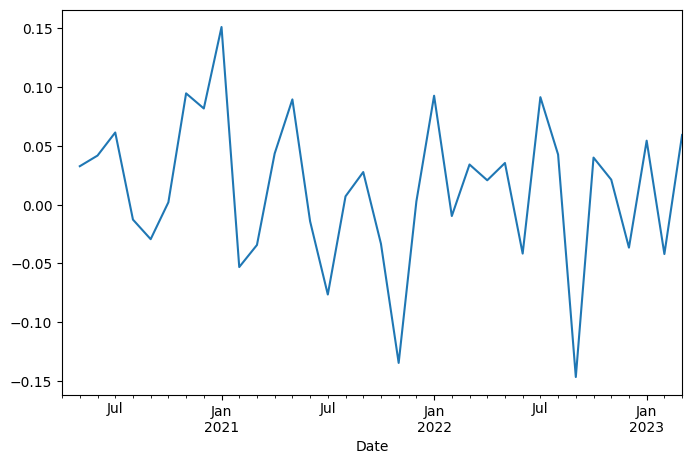

In [ ]:
bajajauto_df['Return_BAJAJ-AUTO'].plot(figsize=(8,5))
plt.show()

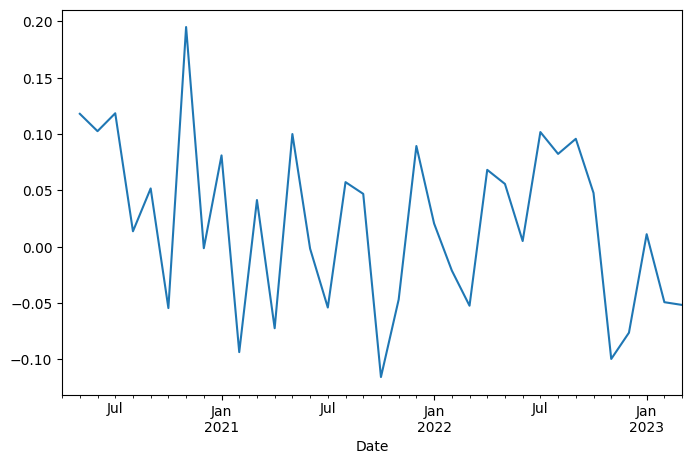

In [ ]:
eichermot_df['Return_EICHERMOT'].plot(figsize=(8,5))
plt.show()


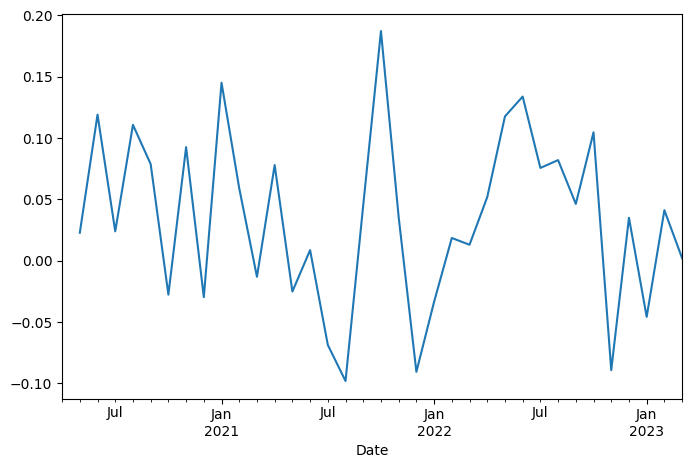

In [ ]:
tvsmotor_df['Return_TVSMOTOR'].plot(figsize=(8,5))
plt.show()

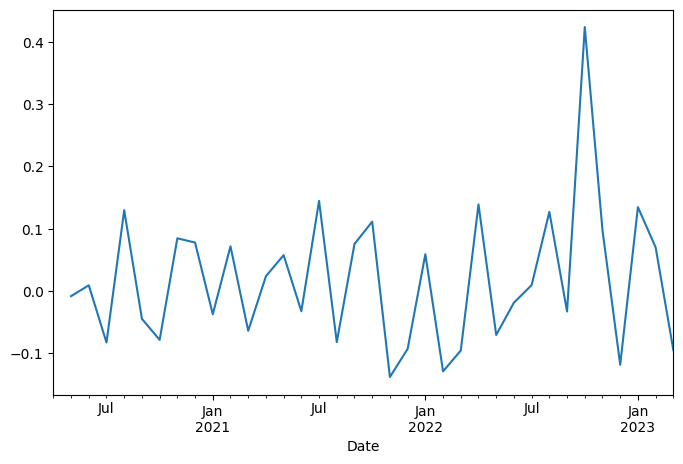

In [ ]:
atulauto_df['Return_ATULAUTO'].plot(figsize=(8,5))
plt.show()

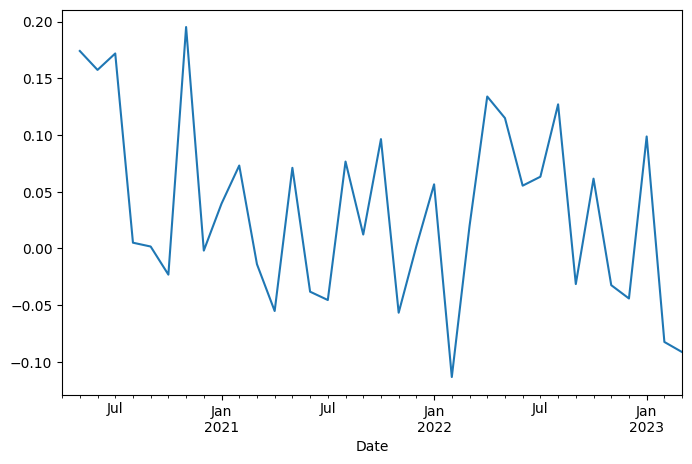

In [ ]:
mahindra_df['Return_M&M'].plot(figsize=(8,5))
plt.show()

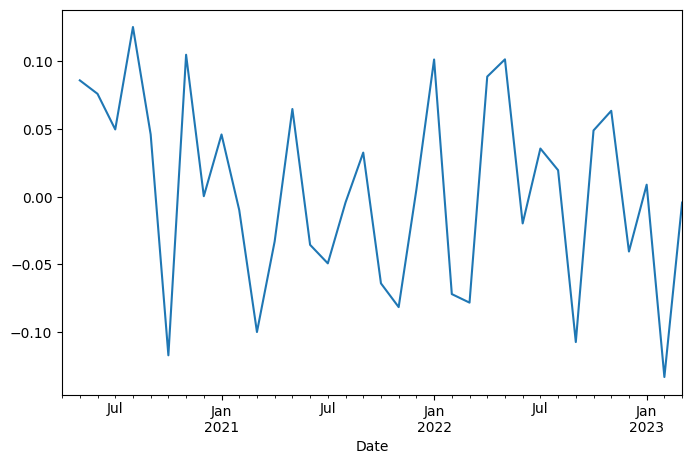

In [ ]:
heromotoco_df['Return_HEROMOTOCO'].plot(figsize=(8,5))
plt.show()

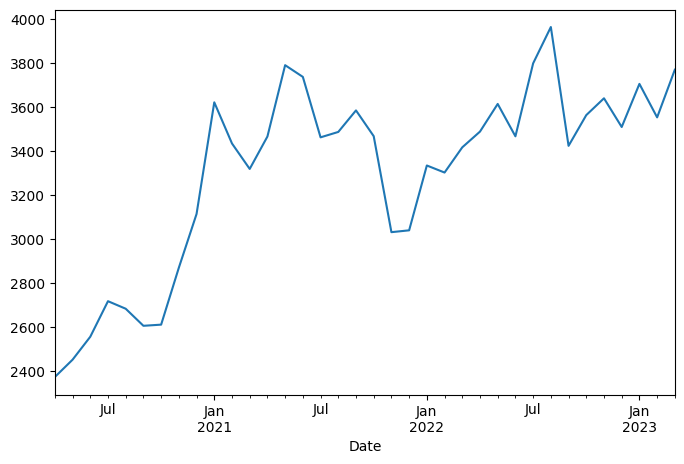

In [ ]:
bajajauto_df['Adj Close'].plot(figsize=(8,5))
plt.show()

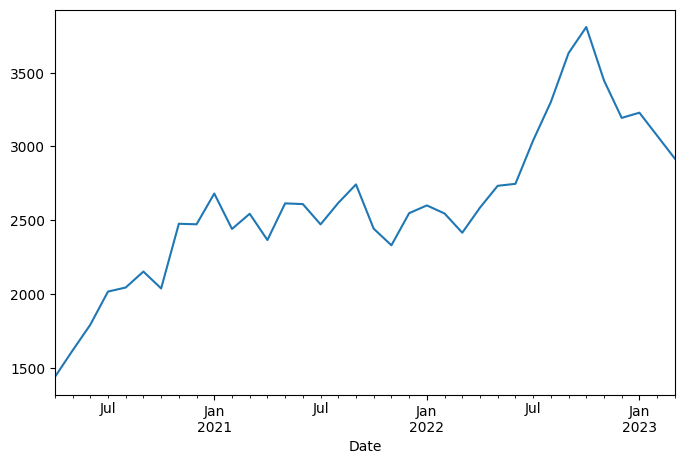

In [ ]:
eichermot_df['Adj Close'].plot(figsize=(8,5))
plt.show()


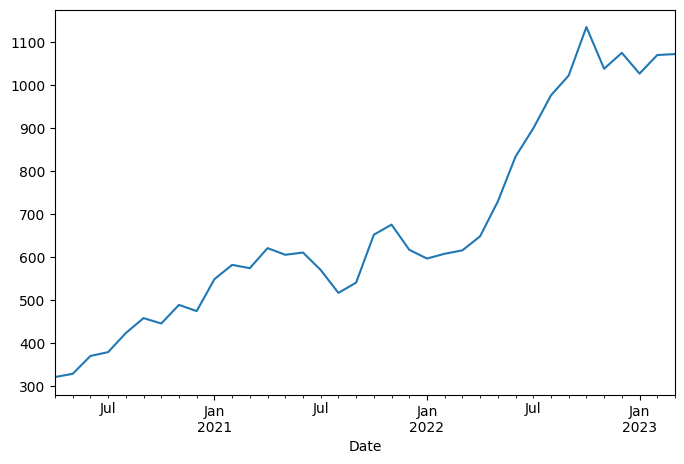

In [ ]:
tvsmotor_df['Adj Close'].plot(figsize=(8,5))
plt.show()

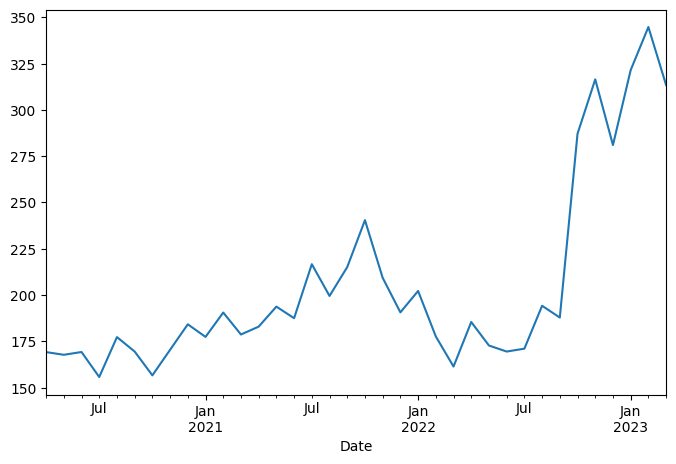

In [ ]:
atulauto_df['Adj Close'].plot(figsize=(8,5))
plt.show()

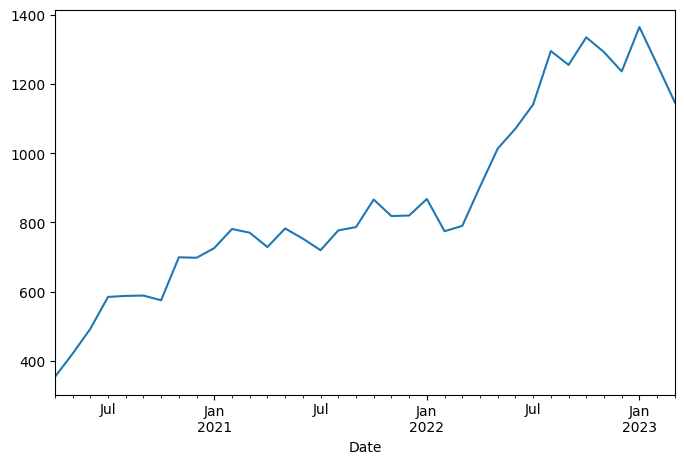

In [ ]:
mahindra_df['Adj Close'].plot(figsize=(8,5))
plt.show()

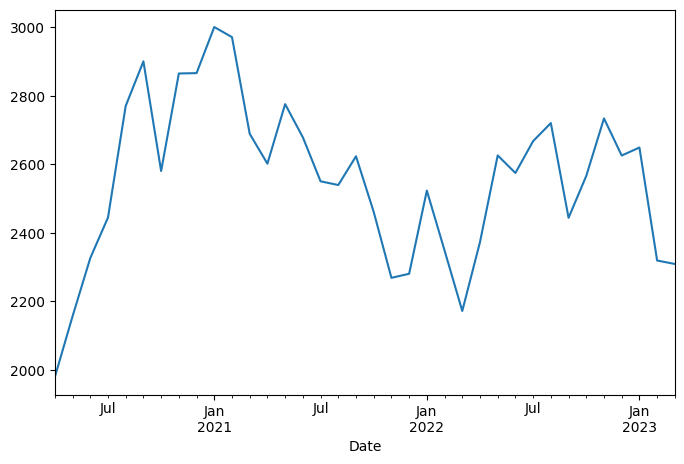

In [ ]:
heromotoco_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
bajajauto_df1_returns = bajajauto_df1['Return_BAJAJ-AUTO']
bajajauto_df1_returns.head()


Date
2020-05-01    0.032700
2020-06-01    0.041747
2020-07-01    0.061381
2020-08-01   -0.012710
2020-09-01   -0.029379
Name: Return_BAJAJ-AUTO, dtype: float64

In [ ]:
eichermot_df1_returns = eichermot_df1['Return_EICHERMOT']
eichermot_df1_returns.head()


Date
2020-05-01    0.117904
2020-06-01    0.102481
2020-07-01    0.118394
2020-08-01    0.013538
2020-09-01    0.051609
Name: Return_EICHERMOT, dtype: float64

In [ ]:
tvsmotor_df1_returns = tvsmotor_df1['Return_TVSMOTOR']
tvsmotor_df1_returns.head()


Date
2020-05-01    0.022733
2020-06-01    0.119006
2020-07-01    0.023896
2020-08-01    0.110675
2020-09-01    0.078718
Name: Return_TVSMOTOR, dtype: float64

In [ ]:
atulauto_df1_returns = atulauto_df1['Return_ATULAUTO']
atulauto_df1_returns.head()


Date
2020-05-01   -0.008604
2020-06-01    0.008899
2020-07-01   -0.083099
2020-08-01    0.129552
2020-09-01   -0.044977
Name: Return_ATULAUTO, dtype: float64

In [ ]:
mahindra_df1_returns = mahindra_df1['Return_M&M']
mahindra_df1_returns.head()


Date
2020-05-01    0.174037
2020-06-01    0.157338
2020-07-01    0.171840
2020-08-01    0.005022
2020-09-01    0.001646
Name: Return_M&M, dtype: float64

In [ ]:
heromotoco_df1_returns = heromotoco_df1['Return_HEROMOTOCO']
heromotoco_df1_returns.head()


Date
2020-05-01    0.085816
2020-06-01    0.075875
2020-07-01    0.049613
2020-08-01    0.125151
2020-09-01    0.045918
Name: Return_HEROMOTOCO, dtype: float64

In [ ]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
Name: Return_NIFTY, dtype: float64

In [ ]:
returns_bajajauto = pd.merge(nifty_df1_returns,bajajauto_df1_returns,how='inner',on='Date')
returns_bajajauto.head()
returns_bajajauto.describe()

,Return_NIFTY,Return_BAJAJ-AUTO
count,35.000000,35.000000
mean,0.016162,0.013243
std,0.043041,0.063366
min,-0.049712,-0.146625
25%,-0.022869,-0.031323
50%,0.008861,0.021247
75%,0.046445,0.048949
max,0.107904,0.151095


In [ ]:
returns_eicher = pd.merge(nifty_df1_returns,eichermot_df1_returns,how='inner',on='Date')
returns_eicher.head()
returns_eicher.describe()

,Return_NIFTY,Return_EICHERMOT
count,35.000000,35.000000
mean,0.016162,0.020241
std,0.043041,0.075401
min,-0.049712,-0.115921
25%,-0.022869,-0.050670
50%,0.008861,0.020469
75%,0.046445,0.081616
max,0.107904,0.194999


In [ ]:
returns_tvs = pd.merge(nifty_df1_returns,tvsmotor_df1_returns,how='inner',on='Date')
returns_tvs.head()
returns_tvs.describe()

,Return_NIFTY,Return_TVSMOTOR
count,35.000000,35.000000
mean,0.016162,0.034425
std,0.043041,0.070572
min,-0.049712,-0.098136
25%,-0.022869,-0.019191
50%,0.008861,0.035510
75%,0.046445,0.080334
max,0.107904,0.187178


In [ ]:
returns_atul = pd.merge(nifty_df1_returns,atulauto_df1_returns,how='inner',on='Date')
returns_atul.head()
returns_atul.describe()

,Return_NIFTY,Return_ATULAUTO
count,35.000000,35.000000
mean,0.016162,0.017603
std,0.043041,0.112486
min,-0.049712,-0.138505
25%,-0.022869,-0.074867
50%,0.008861,0.008899
75%,0.046445,0.080980
max,0.107904,0.423921


In [ ]:
returns_mahindra = pd.merge(nifty_df1_returns,mahindra_df1_returns,how='inner',on='Date')
returns_mahindra.head()
returns_mahindra.describe()

,Return_NIFTY,Return_M&M
count,35.000000,35.000000
mean,0.016162,0.033609
std,0.043041,0.081220
min,-0.049712,-0.113383
25%,-0.022869,-0.031920
50%,0.008861,0.019658
75%,0.046445,0.086443
max,0.107904,0.195146


In [ ]:
returns_hero = pd.merge(nifty_df1_returns,heromotoco_df1_returns,how='inner',on='Date')
returns_hero.head()
returns_hero.describe()

,Return_NIFTY,Return_HEROMOTOCO
count,35.000000,35.000000
mean,0.016162,0.004407
std,0.043041,0.070551
min,-0.049712,-0.133012
25%,-0.022869,-0.044814
50%,0.008861,0.005212
75%,0.046445,0.056479
max,0.107904,0.125151


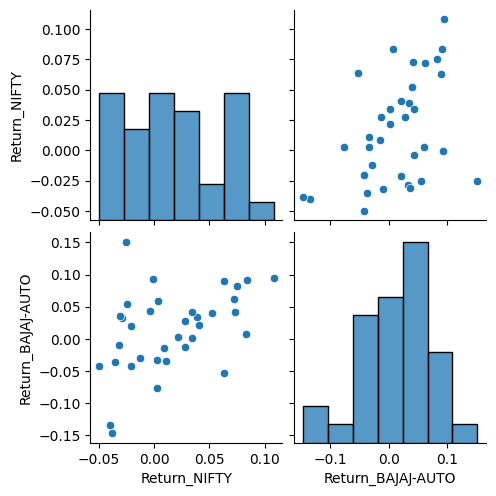

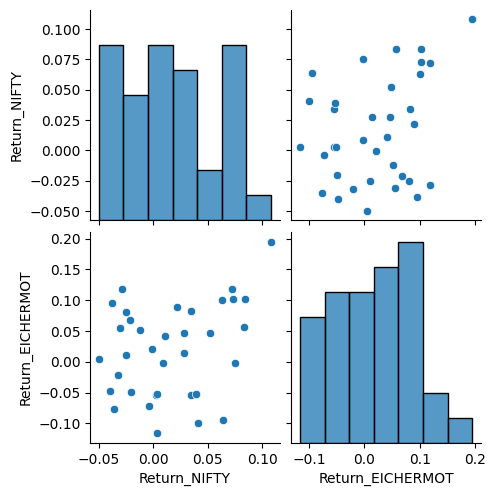

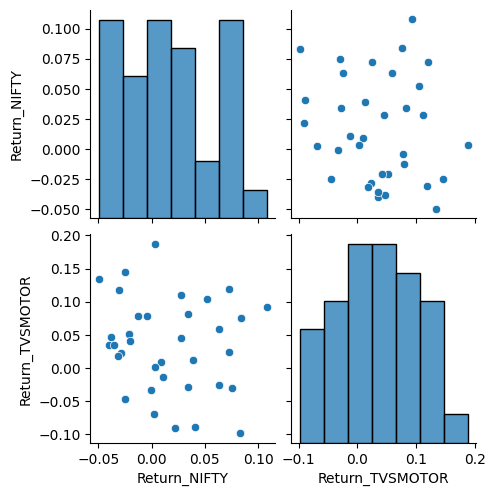

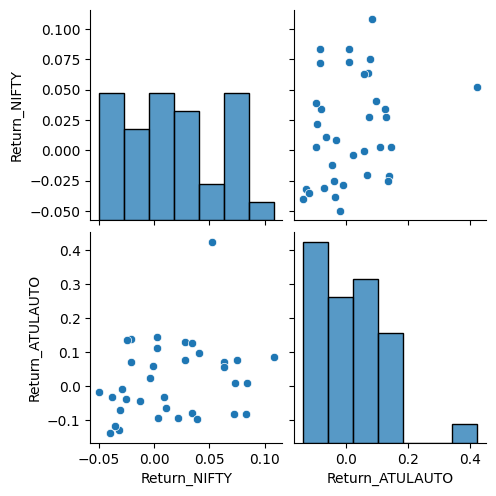

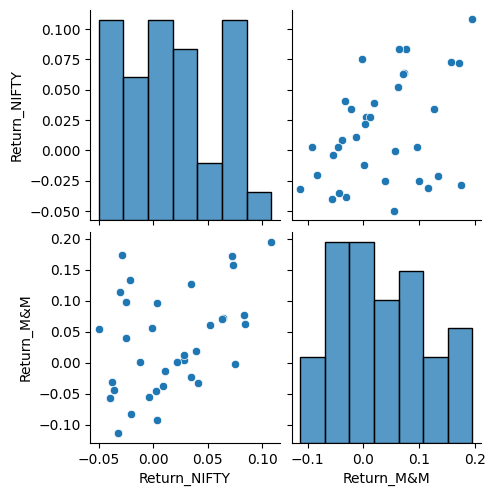

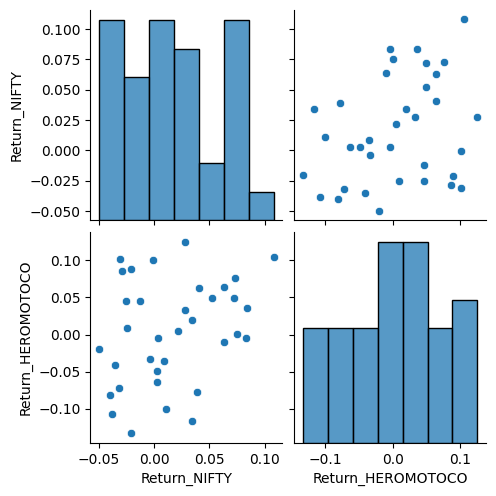

In [ ]:
sns.pairplot(returns_bajajauto)
plt.show()

sns.pairplot(returns_eicher)
plt.show()

sns.pairplot(returns_tvs)
plt.show()

sns.pairplot(returns_atul)
plt.show()

sns.pairplot(returns_mahindra)
plt.show()

sns.pairplot(returns_hero)
plt.show()

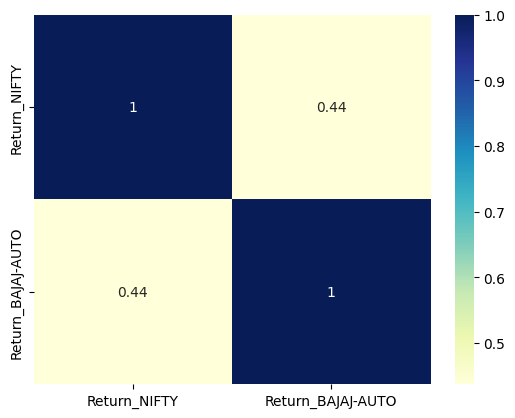

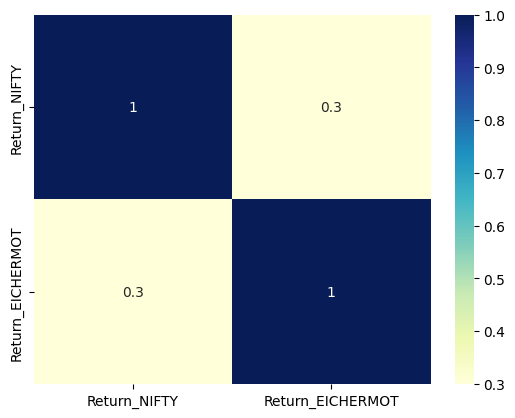

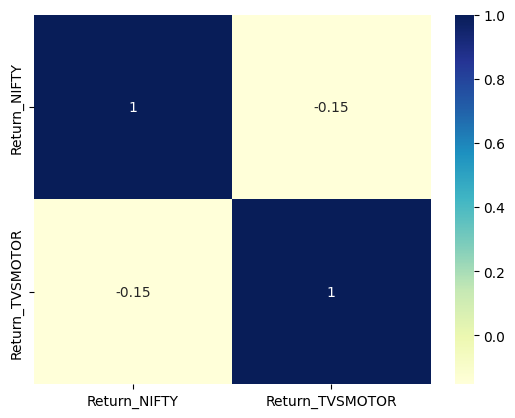

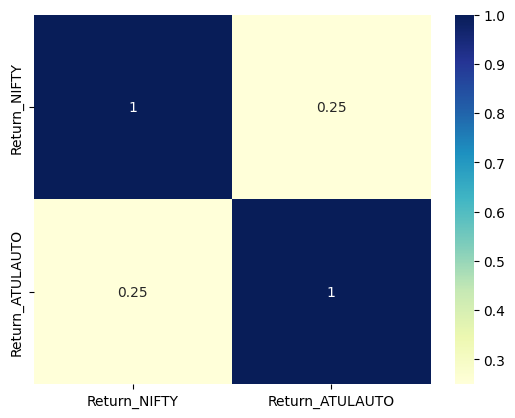

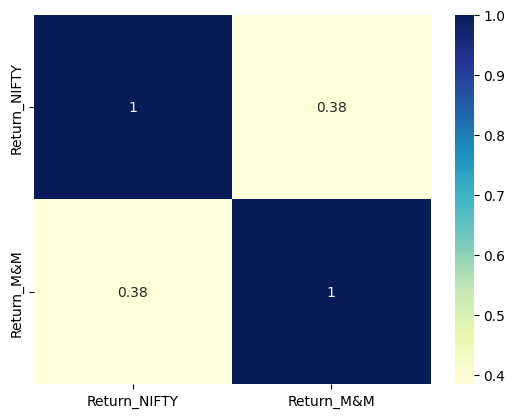

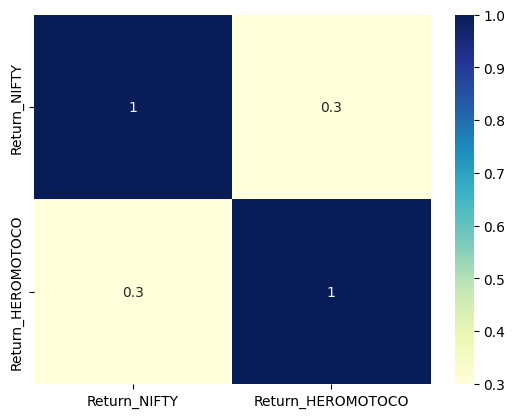

In [ ]:
sns.heatmap(returns_bajajauto.corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.heatmap(returns_eicher.corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.heatmap(returns_tvs.corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.heatmap(returns_atul.corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.heatmap(returns_mahindra.corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.heatmap(returns_hero.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [ ]:
x_bajajauto =  returns_bajajauto['Return_NIFTY']
y_bajajauto = returns_bajajauto['Return_BAJAJ-AUTO']

x_eichermoto = returns_eicher['Return_NIFTY']
y_eichermoto = returns_eicher['Return_EICHERMOT']

x_tvsmotor = returns_tvs['Return_NIFTY']
y_tvsmotor = returns_tvs['Return_TVSMOTOR']

x_atulauto = returns_atul['Return_NIFTY']
y_atulauto = returns_atul['Return_ATULAUTO']

x_mahindra = returns_mahindra['Return_NIFTY']
y_mahindra = returns_mahindra['Return_M&M']

x_heromotoco = returns_hero['Return_NIFTY']
y_heromotoco = returns_hero['Return_HEROMOTOCO']



x_sm_bajajauto = sm.add_constant(x_bajajauto)
x_sm_eichermoto = sm.add_constant(x_eichermoto)
x_sm_tvsmotor = sm.add_constant(x_tvsmotor)
x_sm_atulauto = sm.add_constant(x_atulauto)
x_sm_mahindra = sm.add_constant(x_mahindra)
x_sm_heromotoco = sm.add_constant(x_heromotoco)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model_bajajauto = sm.OLS(y_bajajauto,x_sm_bajajauto)

model_eichermoto = sm.OLS(y_eichermoto,x_sm_eichermoto)

model_tvsmotor = sm.OLS(y_tvsmotor,x_sm_tvsmotor)

model_atulauto = sm.OLS(y_atulauto,x_sm_atulauto)

model_mahindra = sm.OLS(y_mahindra,x_sm_mahindra)

model_heromotoco = sm.OLS(y_heromotoco,x_sm_heromotoco)


#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
result_bajajauto = model_bajajauto.fit()

result_eichermoto = model_eichermoto.fit()

result_tvsmotor = model_tvsmotor.fit()

result_atulauto = model_atulauto.fit()

result_mahindra = model_mahindra.fit()

result_heromotoco = model_heromotoco.fit()

In [ ]:
#Regression result
result_bajajauto.summary()   #for BAJAJ AUTO

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Return_BAJAJ-AUTO   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     7.789
Date:                Wed, 10 Apr 2024   Prob (F-statistic):            0.00867
Time:                        16:52:08   Log-Likelihood:                 51.112
No. Observations:                  35   AIC:                            -98.22
Df Residuals:                      33   BIC:                            -95.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0028      0.010      0.272      0.787      -0.018       0.024
Return_NIFTY     0.6433      0.231      2.791      0.009       0.174       1.112
==============================================================================
Omnibus:                        2.726   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.655
Skew:                           0.167   Prob(JB):                        0.437
Kurtosis:                       4.011   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression result
result_eichermoto.summary() #for EICHER MOTO

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Return_EICHERMOT   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.240
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0810
Time:                        16:52:08   Log-Likelihood:                 42.956
No. Observations:                  35   AIC:                            -81.91
Df Residuals:                      33   BIC:                            -78.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0118      0.013      0.891      0.379      -0.015       0.039
Return_NIFTY     0.5238      0.291      1.800      0.081      -0.068       1.116
==============================================================================
Omnibus:                        1.755   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.280
Skew:                          -0.233   Prob(JB):                        0.527
Kurtosis:                       2.187   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression result
result_tvsmotor.summary() # for TVS MOTOR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Return_TVSMOTOR   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7835
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.382
Time:                        16:52:08   Log-Likelihood:                 44.044
No. Observations:                  35   AIC:                            -84.09
Df Residuals:                      33   BIC:                            -80.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0385      0.013      3.003      0.005       0.012       0.065
Return_NIFTY    -0.2497      0.282     -0.885      0.382      -0.824       0.324
==============================================================================
Omnibus:                        0.867   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.779
Skew:                           0.019   Prob(JB):                        0.677
Kurtosis:                       2.270   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression result
result_atulauto.summary() # for ATUL AUTO

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Return_ATULAUTO   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.182
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.149
Time:                        16:52:08   Log-Likelihood:                 28.438
No. Observations:                  35   AIC:                            -52.88
Df Residuals:                      33   BIC:                            -49.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0071      0.020      0.354      0.726      -0.034       0.048
Return_NIFTY     0.6509      0.441      1.477      0.149      -0.246       1.547
==============================================================================
Omnibus:                       14.327   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.686
Skew:                           1.193   Prob(JB):                     0.000238
Kurtosis:                       5.398   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression result
result_mahindra.summary() # for Mahindra and Mahindra

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_M&M   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.706
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0228
Time:                        16:52:08   Log-Likelihood:                 41.506
No. Observations:                  35   AIC:                            -79.01
Df Residuals:                      33   BIC:                            -75.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0219      0.014      1.590      0.121      -0.006       0.050
Return_NIFTY     0.7245      0.303      2.389      0.023       0.107       1.342
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.179
Skew:                           0.475   Prob(JB):                        0.336
Kurtosis:                       2.231   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Regression result
result_heromotoco.summary() # for HERO MOTOCO

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Return_HEROMOTOCO   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.245
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0808
Time:                        16:52:09   Log-Likelihood:                 45.286
No. Observations:                  35   AIC:                            -86.57
Df Residuals:                      33   BIC:                            -83.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0035      0.012     -0.285      0.778      -0.029       0.022
Return_NIFTY     0.4905      0.272      1.802      0.081      -0.063       1.044
==============================================================================
Omnibus:                        0.794   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.747
Skew:                           0.011   Prob(JB):                        0.688
Kurtosis:                       2.285   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Beta for BAJAJ-AUTO = 0.6433
# Beta for EICHER MOTO = 0.5238, Beta for TVS MOTOR = -0.2497, Beta for ATUL AUTO = 0.6509,Beta for Mahindra and Mahindra = 0.7245, Beta for HERO MOTOCO = 0.4905  
# and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Return_NIFTY       35 non-null     float64
 1   Return_BAJAJ-AUTO  35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_BAJAJ-AUTO'>

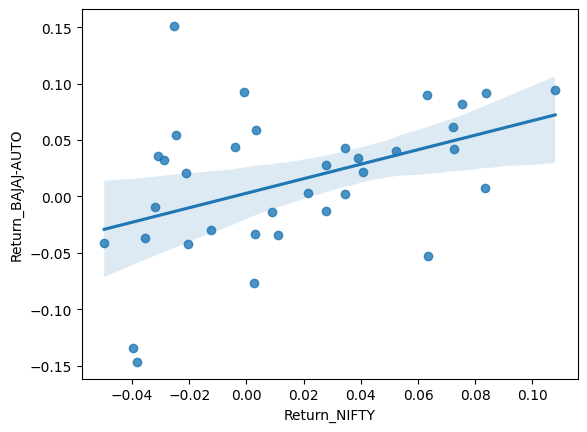

In [ ]:
#Regression - Security Characteristic line
returns_bajajauto.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_BAJAJ-AUTO', data = returns_bajajauto)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Return_NIFTY      35 non-null     float64
 1   Return_EICHERMOT  35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_EICHERMOT'>

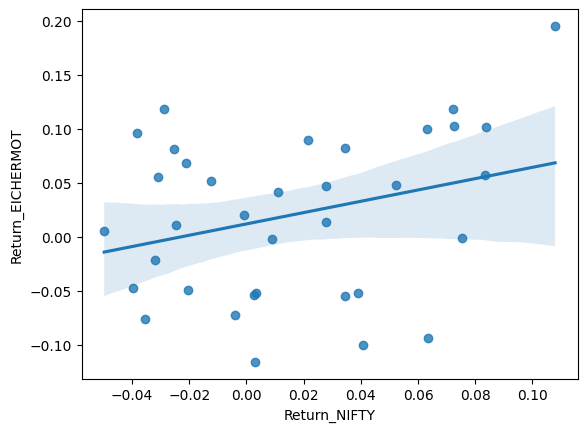

In [ ]:
#Regression - Security Characteristic line
returns_eicher.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_EICHERMOT', data = returns_eicher)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Return_NIFTY     35 non-null     float64
 1   Return_TVSMOTOR  35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_TVSMOTOR'>

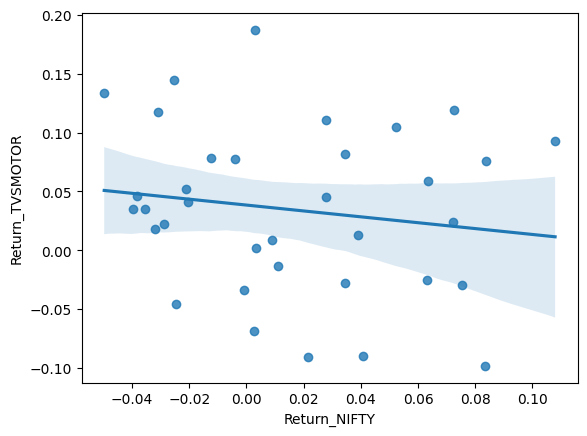

In [ ]:
#Regression - Security Characteristic line
returns_tvs.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_TVSMOTOR', data = returns_tvs)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Return_NIFTY     35 non-null     float64
 1   Return_ATULAUTO  35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_ATULAUTO'>

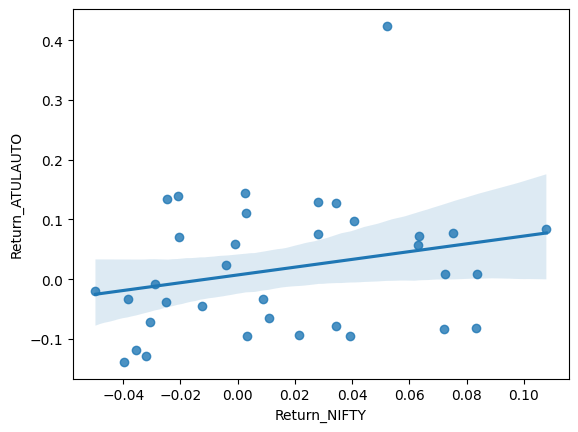

In [ ]:
#Regression - Security Characteristic line
returns_atul.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_ATULAUTO', data = returns_atul)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  35 non-null     float64
 1   Return_M&M    35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_M&M'>

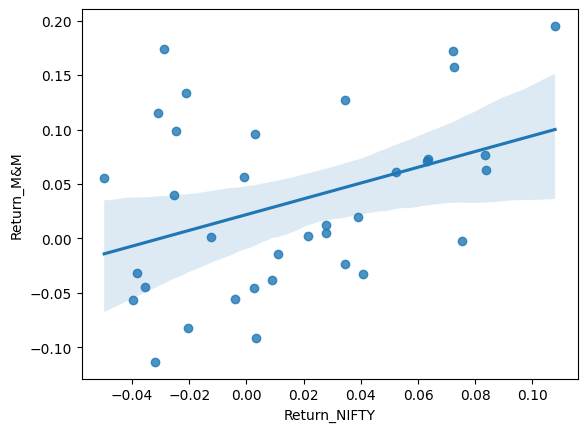

In [ ]:
#Regression - Security Characteristic line
returns_mahindra.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_M&M', data = returns_mahindra)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-05-01 to 2023-03-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Return_NIFTY       35 non-null     float64
 1   Return_HEROMOTOCO  35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes


<Axes: xlabel='Return_NIFTY', ylabel='Return_HEROMOTOCO'>

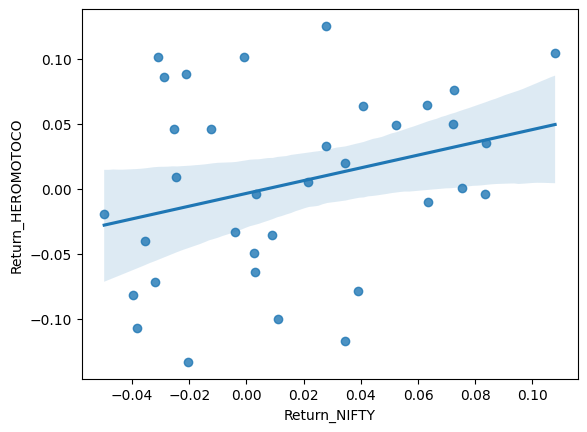

In [ ]:
#Regression - Security Characteristic line
returns_hero.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_HEROMOTOCO', data = returns_hero)

In [ ]:
print('resid', result_bajajauto.resid)

resid Date
2020-05-01    0.048362
2020-06-01   -0.007829
2020-07-01    0.012085
2020-08-01   -0.033546
2020-09-01   -0.024269
2020-10-01   -0.023031
2020-11-01    0.022404
2020-12-01    0.030577
2021-01-01    0.164425
2021-02-01   -0.096811
2021-03-01   -0.044263
2021-04-01    0.043259
2021-05-01    0.046138
2021-06-01   -0.022705
2021-07-01   -0.080992
2021-08-01   -0.049359
2021-09-01    0.006886
2021-10-01   -0.038062
2021-11-01   -0.111905
2021-12-01   -0.013984
2022-01-01    0.090323
2022-02-01    0.008068
2022-03-01    0.006108
2022-04-01    0.031376
2022-05-01    0.052383
2022-06-01   -0.012477
2022-07-01    0.034725
2022-08-01    0.017615
2022-09-01   -0.124919
2022-10-01    0.003543
2022-11-01   -0.007711
2022-12-01   -0.016609
2023-01-01    0.067507
2023-02-01   -0.031665
2023-03-01    0.054351
dtype: float64


In [ ]:
print('resid', result_eichermoto.resid)

resid Date
2020-05-01    0.121196
2020-06-01    0.052658
2020-07-01    0.068799
2020-08-01   -0.012887
2020-09-01    0.046310
2020-10-01   -0.084521
2020-11-01    0.126703
2020-12-01   -0.052643
2021-01-01    0.082345
2021-02-01   -0.138857
2021-03-01    0.023731
2021-04-01   -0.082227
2021-05-01    0.055145
2021-06-01   -0.018287
2021-07-01   -0.067349
2021-08-01    0.001816
2021-09-01    0.020357
2021-10-01   -0.129285
2021-11-01   -0.038074
2021-12-01    0.066221
2022-01-01    0.009122
2022-02-01   -0.016298
2022-03-01   -0.084871
2022-04-01    0.067316
2022-05-01    0.059938
2022-06-01    0.019142
2022-07-01    0.046059
2022-08-01    0.052472
2022-09-01    0.103905
2022-10-01    0.008392
2022-11-01   -0.132902
2022-12-01   -0.069755
2023-01-01    0.012173
2023-02-01   -0.050494
2023-03-01   -0.065350
dtype: float64


In [ ]:
print('resid', result_tvsmotor.resid)

resid Date
2020-05-01   -0.022910
2020-06-01    0.098684
2020-07-01    0.003465
2020-08-01    0.079198
2020-09-01    0.037170
2020-10-01   -0.057558
2020-11-01    0.080996
2020-12-01   -0.049443
2021-01-01    0.100299
2021-02-01    0.036363
2021-03-01   -0.048881
2021-04-01    0.038431
2021-05-01   -0.047924
2021-06-01   -0.027669
2021-07-01   -0.106506
2021-08-01   -0.115799
2021-09-01    0.013758
2021-10-01    0.149475
2021-11-01   -0.012873
2021-12-01   -0.123726
2022-01-01   -0.072236
2022-02-01   -0.027983
2022-03-01   -0.015730
2022-04-01    0.008099
2022-05-01    0.071431
2022-06-01    0.082870
2022-07-01    0.058024
2022-08-01    0.052088
2022-09-01   -0.001744
2022-10-01    0.079180
2022-11-01   -0.117619
2022-12-01   -0.012386
2023-01-01   -0.090506
2023-02-01   -0.002429
2023-03-01   -0.035608
dtype: float64


In [ ]:
print('resid', result_atulauto.resid)

resid Date
2020-05-01    0.003038
2020-06-01   -0.045465
2020-07-01   -0.137179
2020-08-01    0.104266
2020-09-01   -0.044011
2020-10-01   -0.108356
2020-11-01    0.007083
2020-12-01    0.021530
2021-01-01   -0.028322
2021-02-01    0.023042
2021-03-01   -0.078469
2021-04-01    0.019061
2021-05-01    0.009239
2021-06-01   -0.045632
2021-07-01    0.135668
2021-08-01   -0.143747
2021-09-01    0.049982
2021-10-01    0.102120
2021-11-01   -0.119722
2021-12-01   -0.114449
2022-01-01    0.052253
2022-02-01   -0.115667
2022-03-01   -0.128479
2022-04-01    0.145418
2022-05-01   -0.057983
2022-06-01    0.006288
2022-07-01   -0.052477
2022-08-01    0.097404
2022-09-01   -0.015479
2022-10-01    0.382795
2022-11-01    0.063832
2022-12-01   -0.102829
2023-01-01    0.143535
2023-02-01    0.076086
2023-03-01   -0.104373
dtype: float64


In [ ]:
print('resid', result_mahindra.resid)

resid Date
2020-05-01    0.172981
2020-06-01    0.082811
2020-07-01    0.097629
2020-08-01   -0.037138
2020-09-01   -0.011293
2020-10-01   -0.070028
2020-11-01    0.095068
2020-12-01   -0.078320
2021-01-01    0.035773
2021-02-01    0.005101
2021-03-01   -0.043834
2021-04-01   -0.074142
2021-05-01    0.003476
2021-06-01   -0.066478
2021-07-01   -0.069321
2021-08-01   -0.005681
2021-09-01   -0.029948
2021-10-01    0.072227
2021-11-01   -0.049818
2021-12-01   -0.035576
2022-01-01    0.035182
2022-02-01   -0.112103
2022-03-01   -0.030620
2022-04-01    0.127173
2022-05-01    0.115260
2022-06-01    0.069409
2022-07-01   -0.019370
2022-08-01    0.080121
2022-09-01   -0.025686
2022-10-01    0.001676
2022-11-01   -0.083711
2022-12-01   -0.040385
2023-01-01    0.094730
2023-02-01   -0.089529
2023-03-01   -0.115635
dtype: float64


In [ ]:
print('resid', result_heromotoco.resid)

resid Date
2020-05-01    0.103446
2020-06-01    0.043766
2020-07-01    0.017719
2020-08-01    0.114954
2020-09-01    0.055503
2020-10-01   -0.130400
2020-11-01    0.055299
2020-12-01   -0.032992
2021-01-01    0.061744
2021-02-01   -0.037541
2021-03-01   -0.101714
2021-04-01   -0.027440
2021-05-01    0.037284
2021-06-01   -0.036329
2021-07-01   -0.046956
2021-08-01   -0.041597
2021-09-01    0.022328
2021-10-01   -0.061892
2021-11-01   -0.058423
2021-12-01   -0.001863
2022-01-01    0.105118
2022-02-01   -0.052629
2022-03-01   -0.093834
2022-04-01    0.102384
2022-05-01    0.119912
2022-06-01    0.008170
2022-07-01   -0.002020
2022-08-01    0.006156
2022-09-01   -0.084977
2022-10-01    0.026728
2022-11-01    0.046956
2022-12-01   -0.019547
2023-01-01    0.024544
2023-02-01   -0.119442
2023-03-01   -0.002416
dtype: float64


<ipython-input-324-10e86338fd1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_bajajauto.resid)


count    3.500000e+01
mean    -3.568574e-18
std      5.699550e-02
min     -1.249192e-01
25%     -2.796670e-02
50%      3.543161e-03
75%      3.305058e-02
max      1.644251e-01
dtype: float64

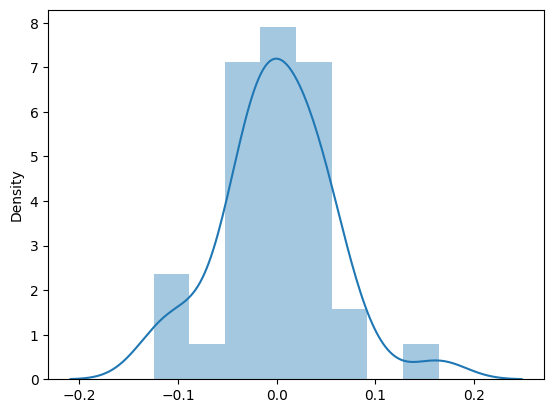

In [ ]:
#Histogram of residuals
sns.distplot(result_bajajauto.resid)
result_bajajauto.resid.describe()

<ipython-input-325-b261502e36b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_eichermoto.resid)


count    3.500000e+01
mean    -3.965082e-19
std      7.195176e-02
min     -1.388565e-01
25%     -5.899671e-02
50%      9.121984e-03
75%      5.390152e-02
max      1.267032e-01
dtype: float64

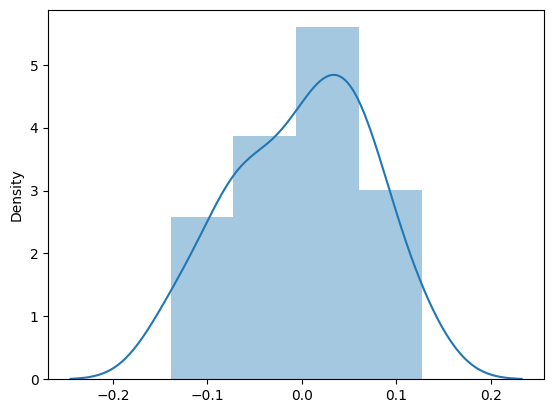

In [ ]:
#Histogram of residuals
sns.distplot(result_eichermoto.resid)
result_eichermoto.resid.describe()

<ipython-input-326-2ddcd1eb32bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_tvsmotor.resid)


count    3.500000e+01
mean    -1.843763e-17
std      6.974872e-02
min     -1.237259e-01
25%     -4.840278e-02
50%     -2.428512e-03
75%      5.505593e-02
max      1.494751e-01
dtype: float64

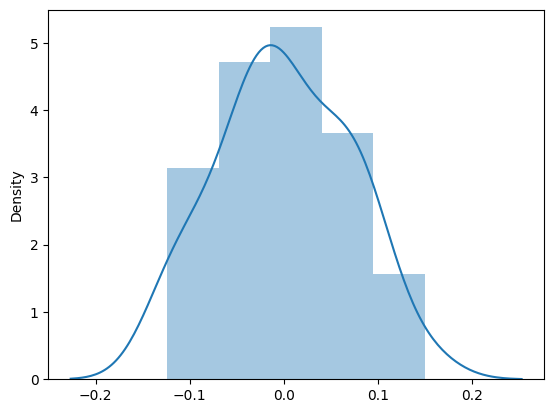

In [ ]:
#Histogram of residuals
sns.distplot(result_tvsmotor.resid)
result_tvsmotor.resid.describe()

<ipython-input-327-b62a4d090447>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_atulauto.resid)


count    3.500000e+01
mean    -1.982541e-18
std      1.089410e-01
min     -1.437468e-01
25%     -9.064908e-02
50%      3.037909e-03
75%      5.804239e-02
max      3.827945e-01
dtype: float64

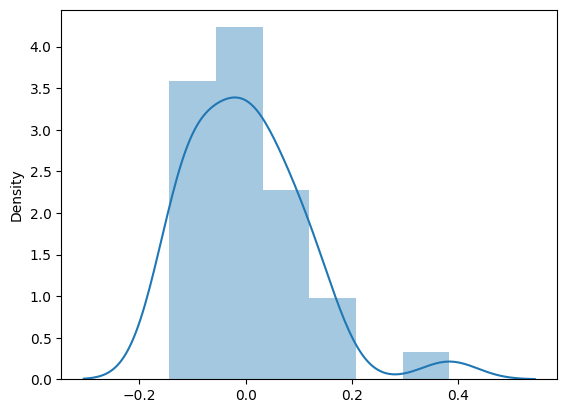

In [ ]:
#Histogram of residuals
sns.distplot(result_atulauto.resid)
result_atulauto.resid.describe()

<ipython-input-328-30547bad40ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_mahindra.resid)


count    3.500000e+01
mean    -7.930164e-18
std      7.499463e-02
min     -1.156345e-01
25%     -5.814807e-02
50%     -1.937024e-02
75%      7.081834e-02
max      1.729807e-01
dtype: float64

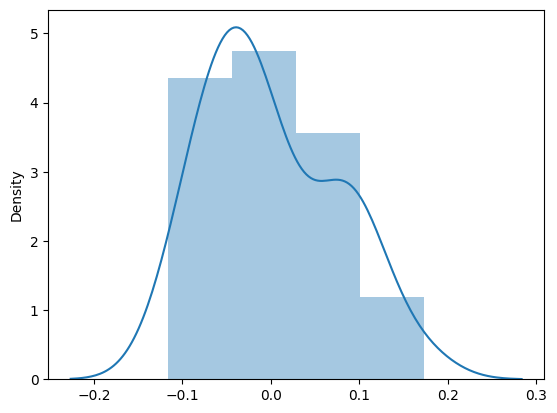

In [ ]:
#Histogram of residuals
sns.distplot(result_mahindra.resid)
result_mahindra.resid.describe()

<ipython-input-329-21ab04b67366>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_heromotoco.resid)


count    3.500000e+01
mean     1.957759e-18
std      6.731821e-02
min     -1.304004e-01
25%     -4.427657e-02
50%     -1.862800e-03
75%      4.536117e-02
max      1.199123e-01
dtype: float64

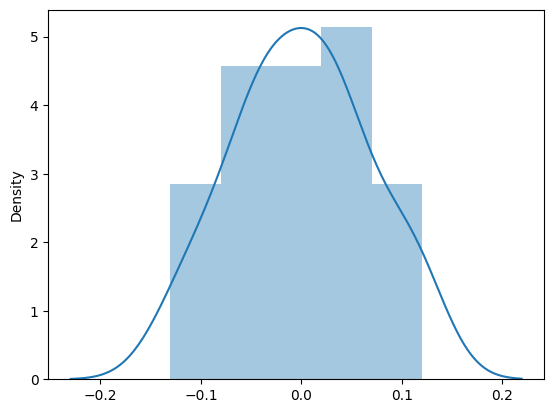

In [ ]:
#Histogram of residuals
sns.distplot(result_heromotoco.resid)
result_heromotoco.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_bajajauto.resid,  result_bajajauto.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 4.385248053353247, 'Test Statistic p-value': 0.11162346104888411, 'F-Statistic': 2.291835288292677, 'F-Test p-value': 0.1174365298269149}


In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_eichermoto.resid,  result_eichermoto.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 1.0980921868210052, 'Test Statistic p-value': 0.5775004291841181, 'F-Statistic': 0.5182444329078768, 'F-Test p-value': 0.6004785632987731}


In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_tvsmotor.resid,  result_tvsmotor.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 1.2652733078577982, 'Test Statistic p-value': 0.5311893903904603, 'F-Statistic': 0.6001048447930749, 'F-Test p-value': 0.5548127415027349}


In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_atulauto.resid,  result_atulauto.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 1.2898682926302225, 'Test Statistic p-value': 0.5246970942059928, 'F-Statistic': 0.6122163170775049, 'F-Test p-value': 0.5483760510261577}


In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_mahindra.resid,  result_mahindra.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 3.4360051906904716, 'Test Statistic p-value': 0.17942417291020965, 'F-Statistic': 1.74173400367031, 'F-Test p-value': 0.19141796860984242}


In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_heromotoco.resid,  result_heromotoco.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 3.15957787722576, 'Test Statistic p-value': 0.20601857618292257, 'F-Statistic': 1.587706527277895, 'F-Test p-value': 0.22007583496931749}


#The errors are homoskedastic as per the White test


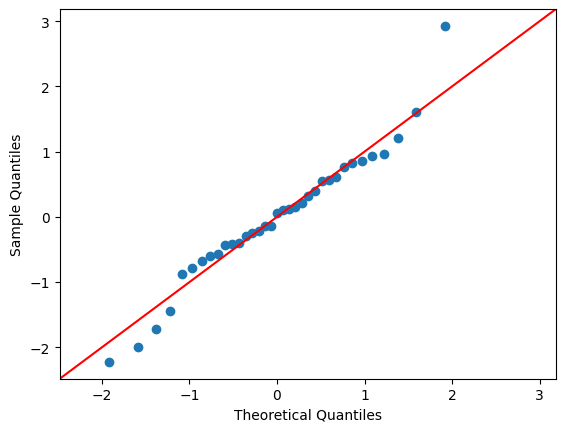

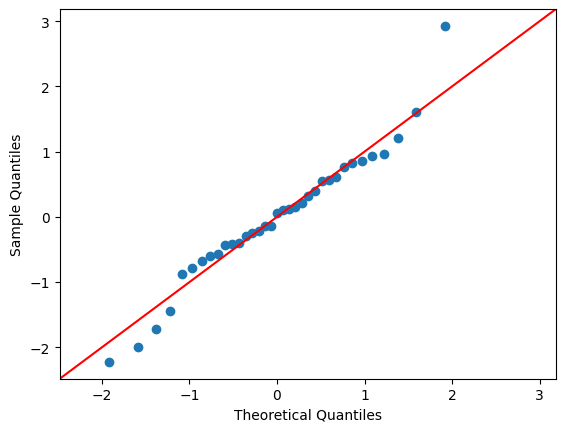

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_bajajauto.resid,line='45',fit=True,dist=stats.norm)

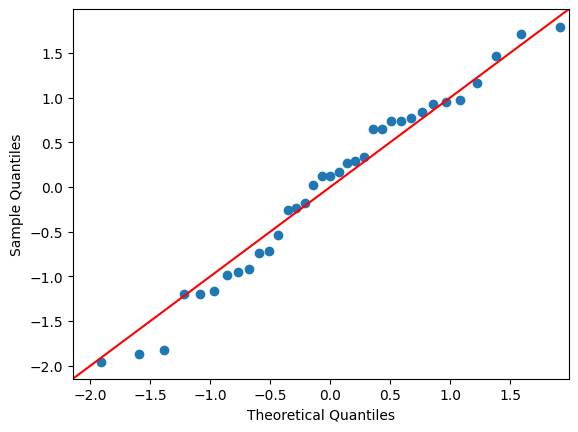

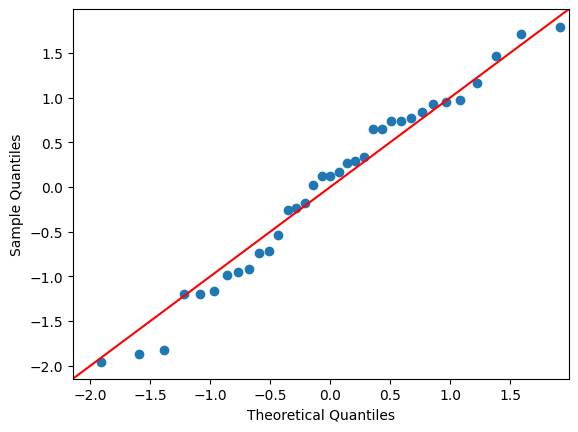

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_eichermoto.resid,line='45',fit=True,dist=stats.norm)

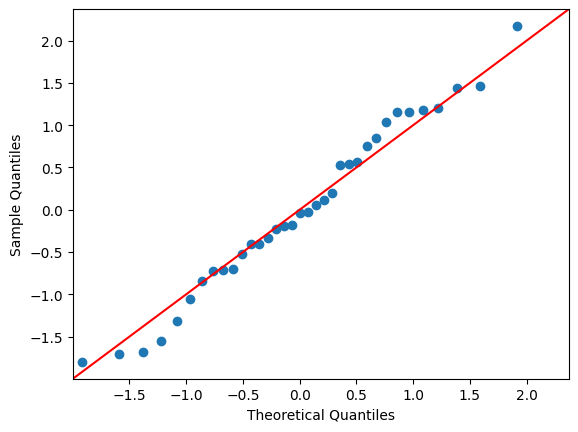

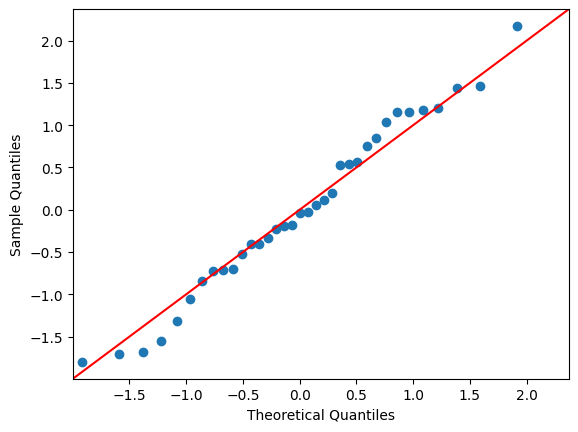

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_tvsmotor.resid,line='45',fit=True,dist=stats.norm)

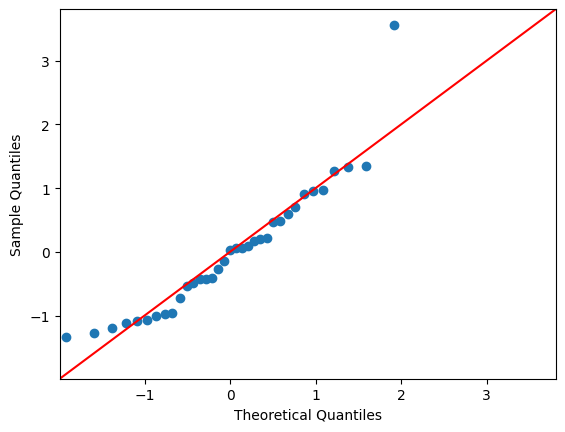

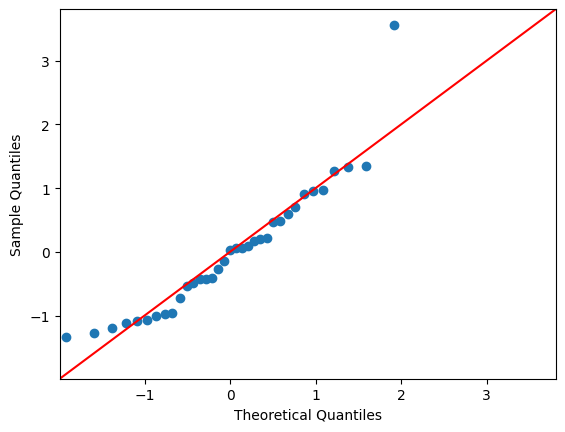

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_atulauto.resid,line='45',fit=True,dist=stats.norm)

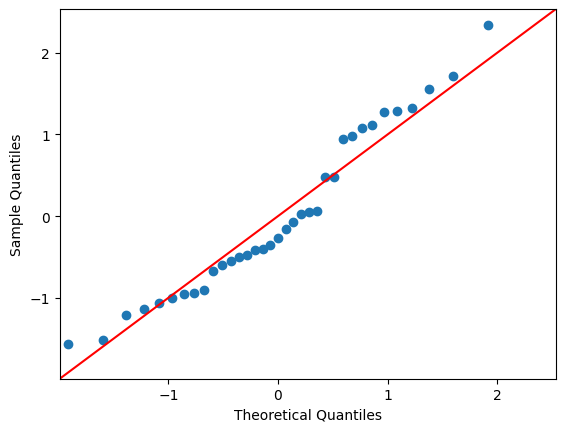

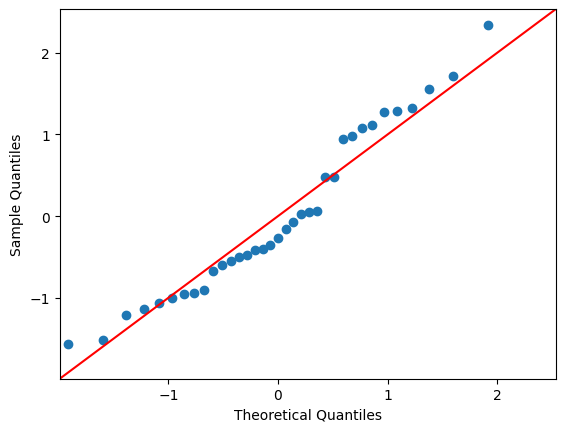

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_mahindra.resid,line='45',fit=True,dist=stats.norm)

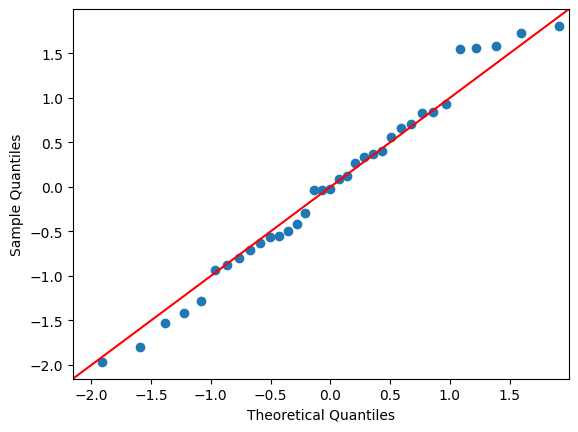

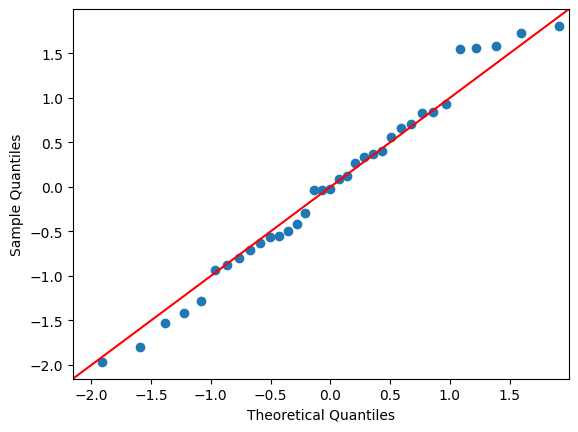

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(result_heromotoco.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(result_bajajauto.resid)

NormaltestResult(statistic=2.7257375149135674, pvalue=0.2559255345561011)

In [ ]:
stats.normaltest(result_eichermoto.resid)

NormaltestResult(statistic=1.755472221397146, pvalue=0.41572299800192314)

In [ ]:
stats.normaltest(result_tvsmotor.resid)

NormaltestResult(statistic=0.8671669657994069, pvalue=0.6481821782290689)

In [ ]:
stats.normaltest(result_atulauto.resid)

NormaltestResult(statistic=14.326950669148943, pvalue=0.0007743587158442975)

In [ ]:
stats.normaltest(result_mahindra.resid)

NormaltestResult(statistic=2.7143835735300335, pvalue=0.2573825481136324)

In [ ]:
stats.normaltest(result_heromotoco.resid)

NormaltestResult(statistic=0.794148914282155, pvalue=0.6722839674268781)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

# Top-Down Beta = 0.6433, Cost of Equity using CAPM = 16.199%, WACC for this Debt/Equity combination = 13.211%

In [ ]:
#calculating cost of equity using top-down approach Beta

risk_free_rate = 0.07154
spread = 0.0075
cost_of_debt = risk_free_rate + spread

nifty_monthly_return = nifty_df['Return_NIFTY'].dropna().mean()
expected_market_return = ((nifty_monthly_return+1)**12)-1    # Rm
beta = result_bajajauto.params['Return_NIFTY']

# CAPM Model

# recent 3 year average figures
debt = (121 + 123 + 124)/3
equity = (289 + 289 + 283)/3
tax_rate = (0.22 + 0.19 + 0.23)/3



cost_of_equity = risk_free_rate + beta*(expected_market_return-risk_free_rate)
print(cost_of_equity)

# calculating WACC using top-down beta

rwacc = ((debt/(equity+debt))*(1-tax_rate)*cost_of_debt) + ((equity/(equity+debt)*cost_of_equity))
print(rwacc)


0.1619997462662266
0.1321101176581674


# Beta unlevered of EICHER MOTO is 0.5176

In [ ]:
# Get the firm's financial data using the Yahoo Finance API
from pandas import Timestamp        #importing pandas library to use Timestamp

timestamps = ['2023-03-31 00:00:00', '2022-03-31 00:00:00', '2021-03-31 00:00:00']      #the timestamps for which we want to calculate the following information which have taken 3rd march 2021,2022,2023

tax_rate = (0.25+0.24+0.23)/3 #we have taken data from screener for every year then taken their average

firm_data = yf.Ticker("EICHERMOT.NS")

balance_sheet = firm_data.balance_sheet.to_dict()

#now we calculate total equity for the given timestamps
total_equity = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Equity Gross Minority Interest' in data:
        total_equity += data['Total Equity Gross Minority Interest']

average_equity = total_equity / len(timestamps)  # Taking average of total equity

#now we calculate debt for the given timestamps
total_debt = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Debt' in data:
        total_debt += data['Total Debt']

average_debt = total_debt / len(timestamps)      # Taking average of total debt


debt_to_equity_ratio = average_debt / average_equity     #calculating debt to equity ratio
print(debt_to_equity_ratio)

beta_levered = result_eichermoto.params['Return_NIFTY']

beta_unlevered_EICHER_MOTO = beta_levered/(1+(1-tax_rate)*debt_to_equity_ratio)    #calculating beta unlevered

print(beta_unlevered_EICHER_MOTO)

0.015764021030649375
0.517594566337927


# Beta unlevered of TVS MOTOR is -0.0748

In [ ]:
# Get the firm's financial data using the Yahoo Finance API
from pandas import Timestamp        #importing pandas library to use Timestamp

timestamps = ['2023-03-31 00:00:00', '2022-03-31 00:00:00', '2021-03-31 00:00:00']      #the timestamps for which we want to calculate the following information which have taken 3rd march 2021,2022,2023

tax_rate = (0.26+0.31+0.32)/3 #we have taken data from screener for every year then taken their average
firm_data = yf.Ticker("TVSMOTOR.NS")

balance_sheet = firm_data.balance_sheet.to_dict()

#now we calculate total equity for the given timestamps
total_equity = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Equity Gross Minority Interest' in data:
        total_equity += data['Total Equity Gross Minority Interest']

average_equity = total_equity / len(timestamps)  # Taking average of total equity

#now we calculate debt for the given timestamps
total_debt = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Debt' in data:
        total_debt += data['Total Debt']

average_debt = total_debt / len(timestamps)      # Taking average of total debt


debt_to_equity_ratio = average_debt / average_equity     #calculating debt to equity ratio
print(debt_to_equity_ratio)

beta_levered = result_tvsmotor.params['Return_NIFTY']

beta_unlevered_TVS_MOTOR = beta_levered/(1+(1-tax_rate)*debt_to_equity_ratio)    #calculating beta unlevered

print(beta_unlevered_TVS_MOTOR)


3.319544163448608
-0.07487922326289201


# Beta unlevered of ATUL AUTO 0.528465


In [ ]:
# Get the firm's financial data using the Yahoo Finance API
from pandas import Timestamp        #importing pandas library to use Timestamp

timestamps = ['2023-03-31 00:00:00', '2022-03-31 00:00:00', '2021-03-31 00:00:00']      #the timestamps for which we want to calculate the following information which have taken 3rd march 2021,2022,2023

tax_rate = (0.22 + 0.23 + 0.46) / 3          # Average tax rate for 3 years which have taken from screener

firm_data = yf.Ticker("ATULAUTO.NS")
balance_sheet = firm_data.balance_sheet.to_dict()

#now we calculate total equity for the given timestamps
total_equity = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Equity Gross Minority Interest' in data:
        total_equity += data['Total Equity Gross Minority Interest']

average_equity = total_equity / len(timestamps)  # Taking average of total equity

#now we calculate debt for the given timestamps
total_debt = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Debt' in data:
        total_debt += data['Total Debt']

average_debt = total_debt / len(timestamps)      # Taking average of total debt


debt_to_equity_ratio = average_debt / average_equity     #calculating debt to equity ratio
print(debt_to_equity_ratio)

beta_levered = result_atulauto.params['Return_NIFTY']

beta_unlevered_ATUL_AUTO = beta_levered/(1+(1-tax_rate)*debt_to_equity_ratio)    #calculating beta unlevered

print(beta_unlevered_ATUL_AUTO)


0.3325795022561087
0.5284652121201615


# Beta unlevered of M&M is 0.36494

In [ ]:
# Get the firm's financial data using the Yahoo Finance API
from pandas import Timestamp        #importing pandas library to use Timestamp

timestamps = ['2023-03-31 00:00:00', '2022-03-31 00:00:00', '2021-03-31 00:00:00']      #the timestamps for which we want to calculate the following information which have taken 3rd march 2021,2022,2023

tax_rate = (0.52+0.23+0.19)/3 #we have taken data from screener for every year then taken their average
firm_data = yf.Ticker("M&M.NS")

balance_sheet = firm_data.balance_sheet.to_dict()

#now we calculate total equity for the given timestamps
total_equity = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Equity Gross Minority Interest' in data:
        total_equity += data['Total Equity Gross Minority Interest']

average_equity = total_equity / len(timestamps)  # Taking average of total equity

#now we calculate debt for the given timestamps
total_debt = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Debt' in data:
        total_debt += data['Total Debt']

average_debt = total_debt / len(timestamps)      # Taking average of total debt


debt_to_equity_ratio = average_debt / average_equity     #calculating debt to equity ratio
print(debt_to_equity_ratio)
beta_levered = result_mahindra.params['Return_NIFTY']

beta_unlevered_MAHINDRA = beta_levered/(1+(1-tax_rate)*debt_to_equity_ratio)    #calculating beta unlevered

print(beta_unlevered_MM)


1.4349075616580238
0.36494196946062624


# Beta unlevered of HERO MOTOCO is 0.4775

In [ ]:
# Get the firm's financial data using the Yahoo Finance API
from pandas import Timestamp        #importing pandas library to use Timestamp

timestamps = ['2023-03-31 00:00:00', '2022-03-31 00:00:00', '2021-03-31 00:00:00']      #the timestamps for which we want to calculate the following information which have taken 3rd march 2021,2022,2023

tax_rate = (0.24+0.24+0.28)/3 #we have taken data from screener for every year then taken their average
firm_data = yf.Ticker("HEROMOTOCO.NS")

balance_sheet = firm_data.balance_sheet.to_dict()

#now we calculate total equity for the given timestamps
total_equity = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Equity Gross Minority Interest' in data:
        total_equity += data['Total Equity Gross Minority Interest']

average_equity = total_equity / len(timestamps)  # Taking average of total equity

#now we calculate debt for the given timestamps
total_debt = 0
for timestamp in timestamps:
    data = balance_sheet[Timestamp(timestamp)]
    if data and 'Total Debt' in data:
        total_debt += data['Total Debt']

average_debt = total_debt / len(timestamps)      # Taking average of total debt


debt_to_equity_ratio = average_debt / average_equity     #calculating debt to equity ratio
print(debt_to_equity_ratio)

beta_levered = result_heromotoco.params['Return_NIFTY']

beta_unlevered_HERO_MOTOCO = beta_levered/(1+(1-tax_rate)*debt_to_equity_ratio)    #calculating beta unlevered

print(beta_unlevered_HERO_MOTOCO)


0.036344929775437816
0.47752616375835377


# BOTTOM UP APPROACH

In [ ]:
# Bottom-Up Approach to finding Beta Levered

beta_unlevered = (beta_unlevered_TVS_MOTOR+beta_unlevered_EICHER_MOTO+beta_unlevered_ATUL_AUTO+beta_unlevered_MAHINDRA+beta_unlevered_HERO_MOTOCO)/5 #  0.3627 taking the average of comparable companies
print(beta_unlevered)
# recent 3 year average figures
debt = (121 + 123 + 124)/3
equity = (289 + 289 + 283)/3
tax_rate = (0.22 + 0.19 + 0.23)/3

beta_levered = beta_unlevered*(1 + (debt/equity)*(1-tax_rate))
print(beta_levered)

0.3627297376828353
0.48469006388600555


In [ ]:
# calculating cost of debt

# Interest Coverage Ratio (High Mkt Cap) = 202 , Rating of AAA implies Spread of 0.75%
risk_free_rate = 0.07154
spread = 0.0075
cost_of_debt = risk_free_rate + spread
print(cost_of_debt)

# calculating cost of equity

cost_of_equity = risk_free_rate + beta_levered*(expected_market_return-risk_free_rate)
print(cost_of_equity)

# calculating WACC

rwacc = ((debt/(equity+debt))*(1-tax_rate)*cost_of_debt) + ((equity/(equity+debt)*cost_of_equity))
print(rwacc)

0.07904
0.13969259989015534
0.1164824097413266


# Bottom-Up Beta = 0.4847, Cost of Equity Levered = 13.97%, WACC for this Debt/Equity combination = 11.65%